# Random Walk

In [190]:
import torch
import numpy as np
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from entropy import cal_node_centrality
import matplotlib.pyplot as plt

In [191]:
# edge_index = torch.Tensor([
#     [0, 1, 2, 3, 4, 5, 3, 6, 7, 8, 9, 1, 2, 3, 4, 5, 0, 6, 7, 8, 9, 2, ],
#     [1, 2, 3, 4, 5, 0, 6, 7, 8, 9, 2, 0, 1, 2, 3, 4, 5, 3, 6, 7, 8, 9, ]
# ]).long()
# edge_index = torch.Tensor([
#     [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 0, 1, 2, 3, 4, 5],
#     [1, 5, 0, 2, 1, 3, 2, 4, 3, 5, 0, 4, 3, 4, 5, 0, 1, 2],
# ]).long()
# edge_index = torch.Tensor([
#     [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 0, 1, 2, 3, 4, 5],
#     [1, 5, 0, 2, 1, 3, 2, 4, 3, 5, 0, 4, 3, 5, 4, 0, 2, 1],
# ]).long()

# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 3, 9, 4, 13, # 1
#      1, 3, 6, 4, 10, 14, # 2
#      2, 4, 7, 1, 11, 15, # 3
#      3, 8, 2, 12, 1, 16, # 4
#      1, 6, 9, 7, 13, 8, # 5
#      2, 5, 7, 10, 8, 14, # 6
#      3, 6, 8, 11, 5, 15, # 7
#      4, 7, 12, 6, 16, 5, # 8
#      5, 10, 13, 1, 11, 12, # 9
#      6, 9, 11, 14, 2, 12, # 10
#      7, 10, 12, 15, 3, 9, # 11
#      8, 11, 16, 4, 10, 9, # 12
#      9, 14, 5, 15, 1, 16, # 13
#      10, 13, 15, 6, 16, 2, # 14
#      11, 14, 16, 7, 13, 3, # 15
#      12, 15, 8, 14, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties
# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 6, 16, 4, 13, # 1
#      1, 3, 6, 13, 7, 14, # 2
#      2, 4, 7, 8, 14, 15, # 3
#      3, 8, 5, 15, 1, 16, # 4
#      1, 6, 9, 4, 10, 8, # 5
#      2, 5, 7, 10, 1, 11, # 6
#      3, 6, 8, 11, 2, 12, # 7
#      4, 7, 12, 3, 9, 5, # 8
#      5, 10, 13, 14, 8, 12, # 9
#      6, 9, 11, 14, 5, 15, # 10
#      7, 10, 12, 15, 6, 16, # 11
#      8, 11, 16, 7, 13, 9, # 12
#      9, 14, 2, 12, 1, 16, # 13
#      13, 15, 10, 3, 9, 2, # 14
#      11, 14, 16, 10, 4, 3, # 15
#      12, 15, 11, 1, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties

edge_index = torch.Tensor([ # global position
    [0, 1, 2, 3, 4, 5, 1, 2, 0,   1, 2, 3, 4, 5, 0, 5, 4, 3,],
    [1, 2, 3, 4, 5, 0, 5, 4, 3,   0, 1, 2, 3, 4, 5, 1, 2, 0,]
    # [0, 0, 0, 1, 1, 1, 2, 2, 2,   3, 3, 3, 4, 4, 4, 5, 5, 5, ],
    # [1, 3, 5, 0, 2, 4, 1, 3, 5,   0, 2, 4, 1, 3, 5, 0, 2, 4, ],
]).long()
x = torch.zeros(edge_index.max()+1, 7)

data = Data(x=x, edge_index=edge_index)
data

Data(x=[6, 7], edge_index=[2, 18])

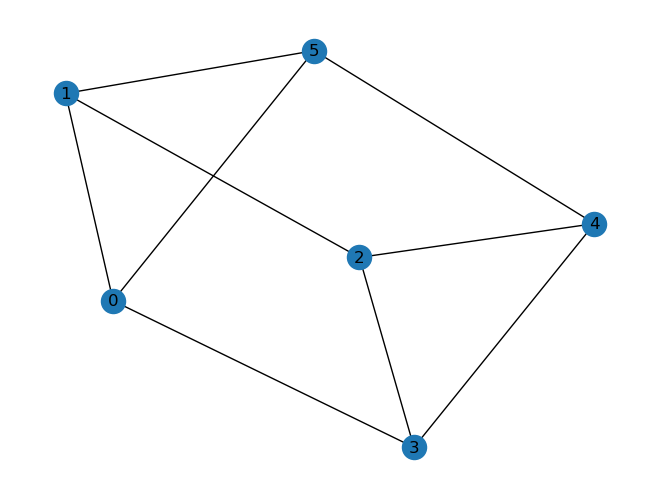

In [192]:
G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True)
plt.show()

In [193]:
A = nx.adjacency_matrix(G).todense()
print(A)

[[0 1 0 1 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 1 0]
 [1 0 1 0 1 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]]


In [194]:
degrees = [val for _, val in G.degree()]
degrees

[3, 3, 3, 3, 3, 3]

In [195]:
D = torch.diag(torch.Tensor(degrees))
# D

In [196]:
def get_RW(G, step):
    A = nx.adjacency_matrix(G).todense()# + np.diag(np.ones(G.number_of_nodes()))
    D = torch.diag(torch.Tensor([val for _, val in G.degree()]))
    
    # RW = torch.Tensor(A)
    RW = torch.mm(torch.Tensor(A), torch.linalg.inv(D))
    out = RW
    for _ in range(step - 1):
        out = torch.mm(out, RW)
    
    return out

RW = get_RW(G, 5) # .diag()
RW

tensor([[0.1235, 0.1893, 0.1440, 0.2099, 0.1440, 0.1893],
        [0.1893, 0.1235, 0.2099, 0.1440, 0.1440, 0.1893],
        [0.1440, 0.2099, 0.1235, 0.1893, 0.1893, 0.1440],
        [0.2099, 0.1440, 0.1893, 0.1235, 0.1893, 0.1440],
        [0.1440, 0.1440, 0.1893, 0.1893, 0.1235, 0.2099],
        [0.1893, 0.1893, 0.1440, 0.1440, 0.2099, 0.1235]])

In [197]:
from torch_geometric.transforms.add_positional_encoding import AddLaplacianEigenvectorPE, AddRandomWalkPE
from torch_geometric.transforms.add_self_loops import AddSelfLoops

In [124]:
ADDSL = AddSelfLoops()
ADDSE = AddRandomWalkPE(walk_length=5)
# data_new = ADDSL(data)
data_new = data
data_new = ADDSE(data_new)

In [1360]:
data_new.random_walk_pe

tensor([[0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617],
        [0.0000, 0.1667, 0.0556, 0.0741, 0.0617]])

# Effective distance

In [65]:
import torch
import numpy as np
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from entropy import cal_node_centrality
import matplotlib.pyplot as plt

In [198]:
# edge_index = torch.Tensor([                                 
#     [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7],
#     [1, 6, 7, 0, 2, 3, 1, 3, 5, 1, 2, 4, 3, 5, 7, 2, 4, 6, 0, 5, 7, 0, 4, 6]
# ]).long()
# edge_index = torch.Tensor([                                
#     [0,  0, 1,  1,  2, 2, 3, 3, 3, 4,  4, 5,  5,  6, 6, 7, 7, 7],
#     [1,  7, 0,  3,  3, 5, 1, 2, 4, 3,  7, 2,  6,  5, 7, 0, 4, 6]
# ]).long()

# edge_index = torch.Tensor([ 
#     [0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5],
#     [1, 2, 0, 3, 0, 4, 5, 1, 4, 5, 2, 3, 2, 3],
# ]).long()

# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 3, 9, 4, 13, # 1
#      1, 3, 6, 4, 10, 14, # 2
#      2, 4, 7, 1, 11, 15, # 3
#      3, 8, 2, 12, 1, 16, # 4
#      1, 6, 9, 7, 13, 8, # 5
#      2, 5, 7, 10, 8, 14, # 6
#      3, 6, 8, 11, 5, 15, # 7
#      4, 7, 12, 6, 16, 5, # 8
#      5, 10, 13, 1, 11, 12, # 9
#      6, 9, 11, 14, 2, 12, # 10
#      7, 10, 12, 15, 3, 9, # 11
#      8, 11, 16, 4, 10, 9, # 12
#      9, 14, 5, 15, 1, 16, # 13
#      10, 13, 15, 6, 16, 2, # 14
#      11, 14, 16, 7, 13, 3, # 15
#      12, 15, 8, 14, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties
# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 6, 16, 4, 13, # 1
#      1, 3, 6, 13, 7, 14, # 2
#      2, 4, 7, 8, 14, 15, # 3
#      3, 8, 5, 15, 1, 16, # 4
#      1, 6, 9, 4, 10, 8, # 5
#      2, 5, 7, 10, 1, 11, # 6
#      3, 6, 8, 11, 2, 12, # 7
#      4, 7, 12, 3, 9, 5, # 8
#      5, 10, 13, 14, 8, 12, # 9
#      6, 9, 11, 14, 5, 15, # 10
#      7, 10, 12, 15, 6, 16, # 11
#      8, 11, 16, 7, 13, 9, # 12
#      9, 14, 2, 12, 1, 16, # 13
#      13, 15, 10, 3, 9, 2, # 14
#      11, 14, 16, 10, 4, 3, # 15
#      12, 15, 11, 1, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties

edge_index = torch.Tensor([ # global position
    [0, 1, 2, 3, 4, 5, 1, 2, 0,   1, 2, 3, 4, 5, 0, 5, 4, 3,],
    [1, 2, 3, 4, 5, 0, 5, 4, 3,   0, 1, 2, 3, 4, 5, 1, 2, 0,]
    # [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7,],
    # [1, 3, 5, 7, 0, 2, 4, 6, 1, 5, 6, 7, 0, 4, 6, 7, 1, 3, 5, 7, 2, 4, 6, 0, 1, 2, 3, 5, 0, 2, 3, 4, ],
    # [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,],
    # # [1, 3, 6, 0, 2, 4, 1, 5, 7, 0, 4, 6, 1, 3, 5, 2, 4, 7, 0, 3, 7, 2, 5, 6,],
    # [0, 0, 0, 1, 1, 1, 2, 2, 2,   3, 3, 3, 4, 4, 4, 5, 5, 5, ],
    # [1, 3, 5, 0, 2, 4, 1, 3, 5,   0, 2, 4, 1, 3, 5, 0, 2, 4, ],
]).long()


x = torch.zeros(edge_index.max()+1, 7)
data = Data(x=x, edge_index=edge_index)
data.edge_index

tensor([[0, 1, 2, 3, 4, 5, 1, 2, 0, 1, 2, 3, 4, 5, 0, 5, 4, 3],
        [1, 2, 3, 4, 5, 0, 5, 4, 3, 0, 1, 2, 3, 4, 5, 1, 2, 0]])

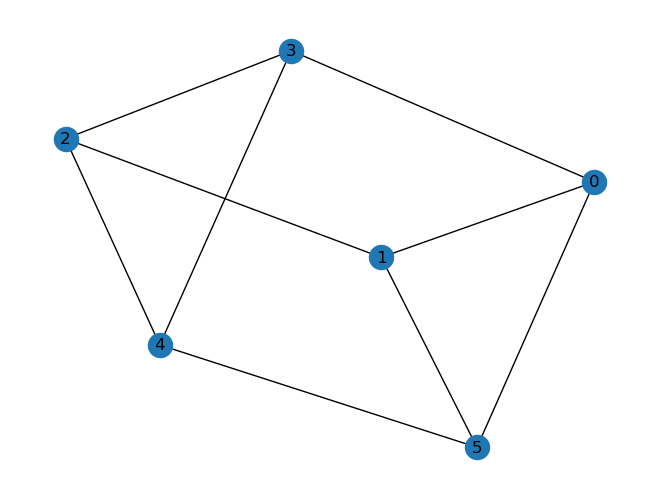

In [199]:
G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True)
plt.show()

In [200]:
def effective_resistance(G, u, v):
    L = nx.laplacian_matrix(G)
    node_one = np.diag(np.ones(G.number_of_nodes()))
    L_inv = np.linalg.pinv(L.todense())
    node_idx_vec = node_one[:, u] - node_one[:, v]
    node_idx_vec = np.array([node_idx_vec]).T
    out = node_idx_vec.T @ L_inv
    out = out @ node_idx_vec
    return out

In [201]:
L = nx.laplacian_matrix(G)
print(L.todense())

[[ 3 -1  0 -1  0 -1]
 [-1  3 -1  0  0 -1]
 [ 0 -1  3 -1 -1  0]
 [-1  0 -1  3 -1  0]
 [ 0  0 -1 -1  3 -1]
 [-1 -1  0  0 -1  3]]


In [202]:
num_nodes = L.todense().shape[0]
node_one = np.diag(np.ones(num_nodes))
node_one

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [203]:
L_inv = np.linalg.pinv(L.todense())
L_inv

array([[ 0.26111111, -0.00555556, -0.10555556, -0.03888889, -0.10555556,
        -0.00555556],
       [-0.00555556,  0.26111111, -0.03888889, -0.10555556, -0.10555556,
        -0.00555556],
       [-0.10555556, -0.03888889,  0.26111111, -0.00555556, -0.00555556,
        -0.10555556],
       [-0.03888889, -0.10555556, -0.00555556,  0.26111111, -0.00555556,
        -0.10555556],
       [-0.10555556, -0.10555556, -0.00555556, -0.00555556,  0.26111111,
        -0.03888889],
       [-0.00555556, -0.00555556, -0.10555556, -0.10555556, -0.03888889,
         0.26111111]])

In [204]:
i, j = 0, 2
er_m = np.zeros([num_nodes, num_nodes])
for i in range(num_nodes):
    for j in range(num_nodes):
        zz = node_one[:, i] - node_one[:, j]
        zz = np.array([zz]).T
        # zz
        out = zz.T @ L_inv
        # out
        out = out @ zz
        er_m[i][j] = out
er_m

array([[0.        , 0.53333333, 0.73333333, 0.6       , 0.73333333,
        0.53333333],
       [0.53333333, 0.        , 0.6       , 0.73333333, 0.73333333,
        0.53333333],
       [0.73333333, 0.6       , 0.        , 0.53333333, 0.53333333,
        0.73333333],
       [0.6       , 0.73333333, 0.53333333, 0.        , 0.53333333,
        0.73333333],
       [0.73333333, 0.73333333, 0.53333333, 0.53333333, 0.        ,
        0.6       ],
       [0.53333333, 0.53333333, 0.73333333, 0.73333333, 0.6       ,
        0.        ]])

# Shortest Path

In [73]:
import torch
import numpy as np
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from entropy import cal_node_centrality
import matplotlib.pyplot as plt

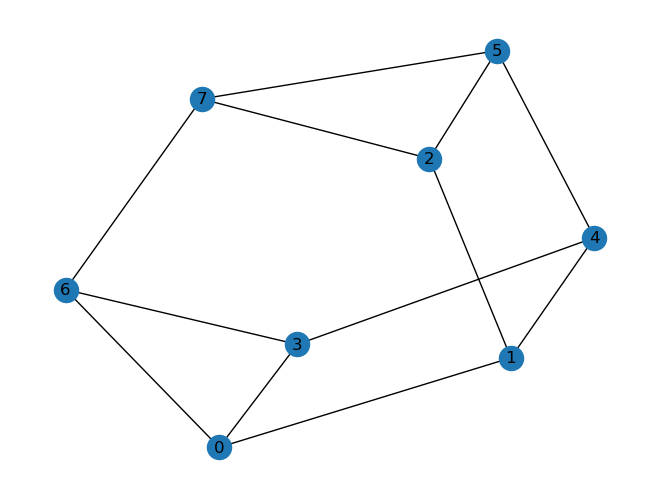

array([[0., 1., 2., 1., 2., 3., 1., 2.],
       [1., 0., 1., 2., 1., 2., 2., 2.],
       [2., 1., 0., 3., 2., 1., 2., 1.],
       [1., 2., 3., 0., 1., 2., 1., 2.],
       [2., 1., 2., 1., 0., 1., 2., 2.],
       [3., 2., 1., 2., 1., 0., 2., 1.],
       [1., 2., 2., 1., 2., 2., 0., 1.],
       [2., 2., 1., 2., 2., 1., 1., 0.]])

In [133]:
# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 3, 9, 4, 13, # 1
#      1, 3, 6, 4, 10, 14, # 2
#      2, 4, 7, 1, 11, 15, # 3
#      3, 8, 2, 12, 1, 16, # 4
#      1, 6, 9, 7, 13, 8, # 5
#      2, 5, 7, 10, 8, 14, # 6
#      3, 6, 8, 11, 5, 15, # 7
#      4, 7, 12, 6, 16, 5, # 8
#      5, 10, 13, 1, 11, 12, # 9
#      6, 9, 11, 14, 2, 12, # 10
#      7, 10, 12, 15, 3, 9, # 11
#      8, 11, 16, 4, 10, 9, # 12
#      9, 14, 5, 15, 1, 16, # 13
#      10, 13, 15, 6, 16, 2, # 14
#      11, 14, 16, 7, 13, 3, # 15
#      12, 15, 8, 14, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties
# edge_index = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 6, 16, 4, 13, # 1
#      1, 3, 6, 13, 7, 14, # 2
#      2, 4, 7, 8, 14, 15, # 3
#      3, 8, 5, 15, 1, 16, # 4
#      1, 6, 9, 4, 10, 8, # 5
#      2, 5, 7, 10, 1, 11, # 6
#      3, 6, 8, 11, 2, 12, # 7
#      4, 7, 12, 3, 9, 5, # 8
#      5, 10, 13, 14, 8, 12, # 9
#      6, 9, 11, 14, 5, 15, # 10
#      7, 10, 12, 15, 6, 16, # 11
#      8, 11, 16, 7, 13, 9, # 12
#      9, 14, 2, 12, 1, 16, # 13
#      13, 15, 10, 3, 9, 2, # 14
#      11, 14, 16, 10, 4, 3, # 15
#      12, 15, 11, 1, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties
edge_index1 = torch.Tensor([ # global position
    # [0, 1, 2, 3, 4, 5, 1, 2, 0,   1, 2, 3, 4, 5, 0, 5, 4, 3,],
    # [1, 2, 3, 4, 5, 0, 5, 4, 3,   0, 1, 2, 3, 4, 5, 1, 2, 0,]
    # [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7,],
    # [1, 3, 5, 7, 0, 2, 4, 6, 1, 5, 6, 7, 0, 4, 6, 7, 1, 3, 5, 7, 2, 4, 6, 0, 1, 2, 3, 5, 0, 2, 3, 4, ],
    [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,],
    [1, 3, 6, 0, 2, 4, 1, 5, 7, 0, 4, 6, 1, 3, 5, 2, 4, 7, 0, 3, 7, 2, 5, 6,],
]).long()

num_nodes = edge_index.max() + 1
x = torch.zeros(num_nodes, 7)
data = Data(x=x, edge_index=edge_index)

G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True)
plt.show()

sp_d = dict(nx.shortest_path_length(G))
sp_m = np.zeros([num_nodes, num_nodes])
for k1, v1 in sp_d.items():
    for k2, v2 in v1.items():
        sp_m[k1][k2] = v2
sp_m

# QESE

In [184]:
import torch
import numpy as np
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from entropy import cal_node_centrality, cal_edge_centrality
import matplotlib.pyplot as plt

In [189]:
# edge_index1 = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 3, 9, 4, 13, # 1
#      1, 3, 6, 4, 10, 14, # 2
#      2, 4, 7, 1, 11, 15, # 3
#      3, 8, 2, 12, 1, 16, # 4
#      1, 6, 9, 7, 13, 8, # 5
#      2, 5, 7, 10, 8, 14, # 6
#      3, 6, 8, 11, 5, 15, # 7
#      4, 7, 12, 6, 16, 5, # 8
#      5, 10, 13, 1, 11, 12, # 9
#      6, 9, 11, 14, 2, 12, # 10
#      7, 10, 12, 15, 3, 9, # 11
#      8, 11, 16, 4, 10, 9, # 12
#      9, 14, 5, 15, 1, 16, # 13
#      10, 13, 15, 6, 16, 2, # 14
#      11, 14, 16, 7, 13, 3, # 15
#      12, 15, 8, 14, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties
# edge_index2 = torch.Tensor([
#     [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, ],
#     [2, 5, 6, 16, 4, 13, # 1
#      1, 3, 6, 13, 7, 14, # 2
#      2, 4, 7, 8, 14, 15, # 3
#      3, 8, 5, 15, 1, 16, # 4
#      1, 6, 9, 4, 10, 8, # 5
#      2, 5, 7, 10, 1, 11, # 6
#      3, 6, 8, 11, 2, 12, # 7
#      4, 7, 12, 3, 9, 5, # 8
#      5, 10, 13, 14, 8, 12, # 9
#      6, 9, 11, 14, 5, 15, # 10
#      7, 10, 12, 15, 6, 16, # 11
#      8, 11, 16, 7, 13, 9, # 12
#      9, 14, 2, 12, 1, 16, # 13
#      13, 15, 10, 3, 9, 2, # 14
#      11, 14, 16, 10, 4, 3, # 15
#      12, 15, 11, 1, 4, 13, # 16
#      ]
# ]).long() - 1 # On Weisfeiler-Leman Invariance: Subgraph Counts and Related Graph Properties

edge_index1 = torch.Tensor([ # global position
    [0, 1, 2, 3, 4, 5, 1, 2, 0,   1, 2, 3, 4, 5, 0, 5, 4, 3,],
    [1, 2, 3, 4, 5, 0, 5, 4, 3,   0, 1, 2, 3, 4, 5, 1, 2, 0,]
    # [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7,],
    # [1, 3, 5, 7, 0, 2, 4, 6, 1, 5, 6, 7, 0, 4, 6, 7, 1, 3, 5, 7, 2, 4, 6, 0, 1, 2, 3, 5, 0, 2, 3, 4, ],
    # [0, 0, 0, 1, 1, 1, 2, 2, 2,   3, 3, 3, 4, 4, 4, 5, 5, 5, ],
    # [1, 3, 5, 0, 2, 4, 1, 3, 5,   0, 2, 4, 1, 3, 5, 0, 2, 4, ],
]).long()

edge_index = edge_index1

# symmetry
# edge_index_inv = torch.stack([edge_index[1], edge_index[0]])
# edge_index = torch.concat([edge_index, edge_index_inv], dim=-1)

eig = 'np' # 'appro_deg_ge0' 'np'
num_nodes = edge_index.max() + 1
x = torch.zeros(num_nodes, 7)
data = Data(x=x, edge_index=edge_index)
data = [data]
nc = cal_node_centrality(data, eig=eig)[0]
ec = cal_edge_centrality(data, eig=eig)[0]
nc, ec

1.3034402958892364 2.2405330040422813 1.4056390622295671 2.873638880654258e-16
1.303440295889237 2.2405330040422813 1.4056390622295662 2.873638880654258e-16
1.303440295889237 2.2405330040422813 1.4056390622295662 2.873638880654258e-16
1.303440295889237 2.2405330040422813 1.4056390622295662 2.873638880654258e-16
1.303440295889237 2.2405330040422813 1.4056390622295662 2.873638880654258e-16
1.303440295889237 2.2405330040422813 1.4056390622295662 2.873638880654258e-16


([1.3034402958892364,
  1.303440295889237,
  1.303440295889237,
  1.303440295889237,
  1.303440295889237,
  1.303440295889237],
 [0.16720159332633244,
  0.1816096121637516,
  0.167201593326336,
  0.16720159332633333,
  0.18160961216375116,
  0.16720159332633333,
  0.167201593326336,
  0.16720159332633378,
  0.1816096121637516,
  0.16720159332633244,
  0.1816096121637516,
  0.167201593326336,
  0.16720159332633333,
  0.18160961216375116,
  0.16720159332633333,
  0.167201593326336,
  0.16720159332633378,
  0.1816096121637516])